In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import io

# Load the data
from google.colab import files
uploaded = files.upload()
uploaded_file = next(iter(uploaded))

# Read the Excel file into a Pandas DataFrame
df = pd.read_excel(io.BytesIO(uploaded[uploaded_file]))

# 1. Count of Males/Females in the entire organization
gender_counts = df['Gender'].value_counts()


Saving HR analytics.xlsx to HR analytics (4).xlsx


In [79]:
df_cleaned = df.dropna(subset=['Salary', 'Gender','Loc','Department'])
# 1. Count of Males/Females in the entire organization
gender_counts = df['Gender'].value_counts()

In [80]:
# 2. Count of Males/Females in each department and location
gender_dept_counts = df.groupby(['Department', 'Gender']).size()
gender_loc_counts = df.groupby(['Loc', 'Gender']).size()
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

In [81]:
# 3. Department with the highest average pay
highest_avg_pay_dept = df.groupby('Department')['Salary'].mean().idxmax()

# 4. Location with the highest average pay
highest_avg_pay_loc = df.groupby('Loc')['Salary'].mean().idxmax()

In [82]:
# 5. Percentage of employees with good & very good rating, poor & very poor rating, and average rating
good_ratings = ['Good', 'Very Good']
poor_ratings = ['Poor', 'Very Poor']
avg_rating=['Average']
good_rating_pct =( df[df['Rating'].isin(good_ratings)].shape[0] / df.shape[0] )* 100
poor_rating_pct =( df[df['Rating'].isin(poor_ratings)].shape[0] / df.shape[0] ) * 100
avg_rating_pct = ( df[df['Rating'].isin(avg_rating)].shape[0] / df.shape[0] ) * 100
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

In [83]:
# 6. Compute gender pay gap for each department

dept_gender_pay_gap = df.groupby(['Department', 'Gender'])['Salary'].mean().unstack()
dept_gender_pay_gap['pay_gap'] = dept_gender_pay_gap['Male'] - dept_gender_pay_gap['Female']




In [84]:
# 7. Compute gender pay gap for each location
loc_gender_pay_gap = df.groupby(['Loc', 'Gender'])['Salary'].mean().unstack()
loc_gender_pay_gap['pay_gap'] = loc_gender_pay_gap['Male'] - loc_gender_pay_gap['Female']


In [ ]:
# Print the results
print(f"Gender Counts:\n{gender_counts}\n")
print(f"Gender Counts by Department:\n{gender_dept_counts}\n")
print(f"Gender Counts by Location:\n{gender_loc_counts}\n")
print(f"Department with Highest Average Pay: {highest_avg_pay_dept}\n")
print(f"Location with Highest Average Pay: {highest_avg_pay_loc}\n")
print(f"Percentage of Employees with Good & Very Good Rating: {good_rating_pct}%\n")
print(f"Percentage of Employees with Poor & Very Poor Rating: {poor_rating_pct}%\n")
print(f"Average Rating: {avg_rating}\n")
print(f"Gender Pay Gap by Department:\n{dept_gender_pay_gap}\n")
print(f"Gender Pay Gap by Loc:\n{loc_gender_pay_gap}\n")

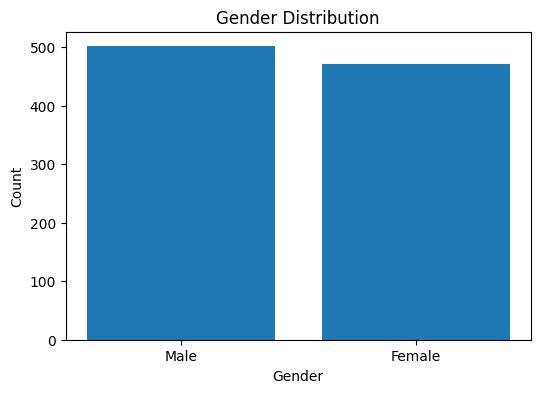

In [86]:
# Gender Distribution
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(gender_counts.index, gender_counts.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

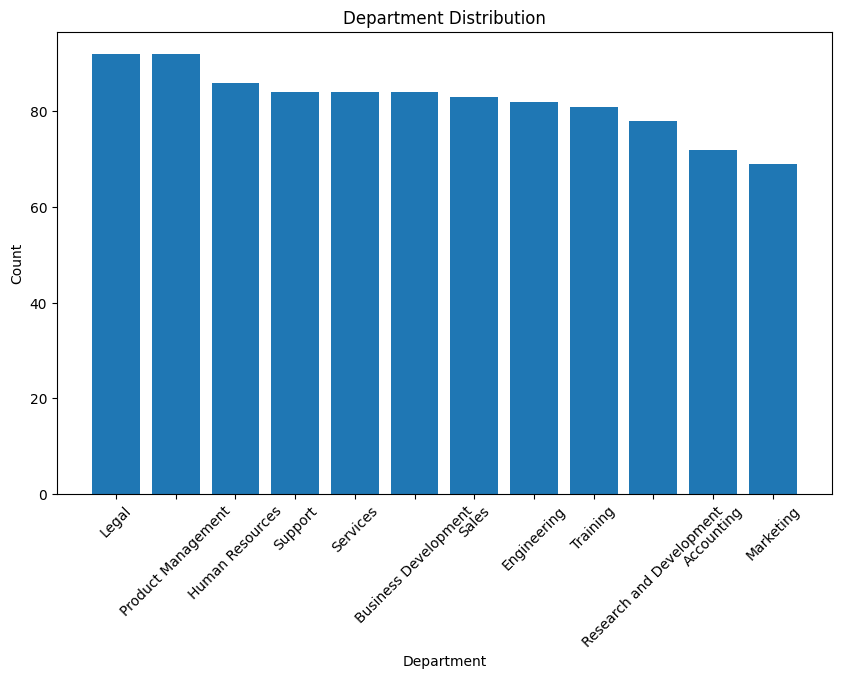

In [95]:
# Department Distribution
dept_counts = df['Department'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(dept_counts.index, dept_counts.values)
plt.title('Department Distribution')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

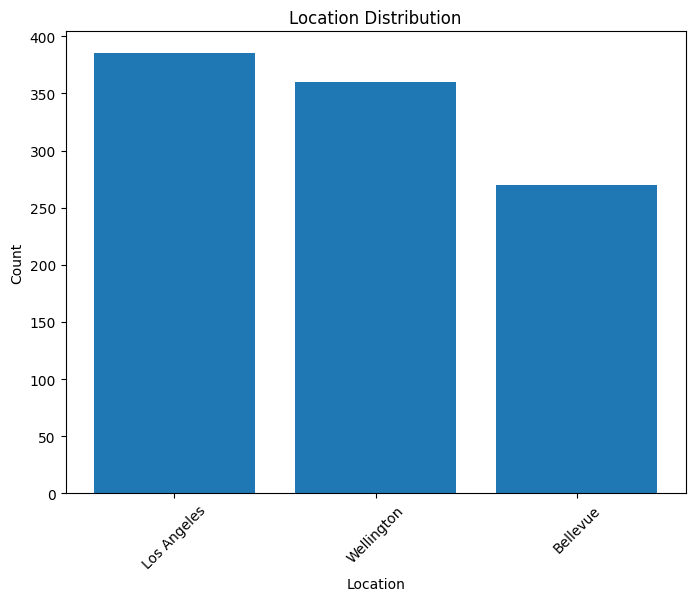

In [94]:
# Location Distribution
loc_counts = df['Loc'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(loc_counts.index, loc_counts.values)
plt.title('Location Distribution')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [113]:
df['Salary'].describe()
df['Salary'].isna().sum()
df['Salary'].fillna(df['Salary'].median(), inplace=True)

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


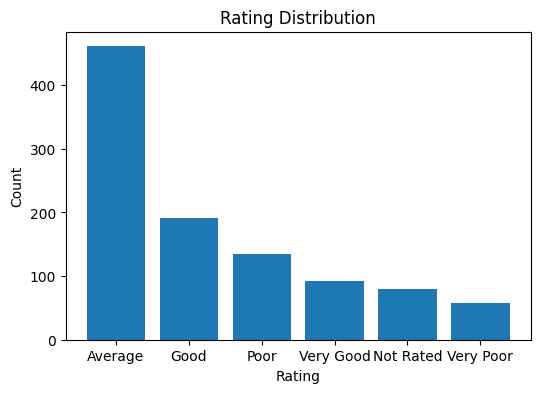

In [90]:
# Rating Distribution
rating_counts = df['Rating'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(rating_counts.index, rating_counts.values)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()